(3508, 2479)


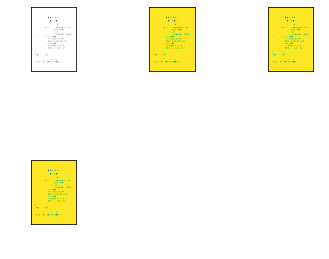

In [85]:
from turtle import color
import cv2
import matplotlib
from PIL import Image
import pytesseract
from tqdm import tqdm
from pathlib import Path
import imutils
import re
import requests
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from wand.image import Image as wi
from tempfile import TemporaryDirectory

def image_to_gray(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def image_to_binary(image):
    binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    return binary_image

def image_to_mean_binary(image):
    binary_image_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 100)
    return binary_image_mean


file_path = Path('./page_001.jpg')
img = cv2.imread(str(file_path), cv2.IMREAD_COLOR)
plt.subplot(3,3,1)
plt.xticks([]), plt.yticks([])
plt.imshow(img), plt.xlabel('color', color="white", fontsize=20)

gray_image = image_to_gray(img)
print(gray_image.shape)
plt.subplot(3,3,2)
plt.xticks([]), plt.yticks([])
plt.imshow(gray_image), plt.xlabel('gray', color="white", fontsize=20)
cv2.imwrite('./gray.jpg', gray_image)

binary_image = image_to_binary(gray_image)
plt.subplot(3,3,3)
plt.xticks([]), plt.yticks([])
plt.imshow(binary_image), plt.xlabel('binary', color="white", fontsize=20)
cv2.imwrite('./binary.jpg', binary_image)

binary_image_mean = image_to_mean_binary(gray_image)
plt.subplot(3,3,7)
plt.xticks([]), plt.yticks([])
plt.imshow(binary_image_mean), plt.xlabel('binary_m', color="white", fontsize=20)
cv2.imwrite('./binary_mean.jpg', binary_image_mean)

binary_image_binary = image_to_binary(gray_image)
plt.subplot(3,3,7)
plt.xticks([]), plt.yticks([])
plt.imshow(binary_image_binary), plt.xlabel('binary_m', color="white", fontsize=20)
cv2.imwrite('./binary_binary.jpg', binary_image_binary)


with open('./binary.txt', 'a') as output_file:
    text = str(
        (
            pytesseract.image_to_string(
                Image.open('./binary.jpg'), lang="eng+kor"
            )
        )
    )
    print(text)
    output_file.write(text)


In [11]:
import easyocr

reader = easyocr.Reader(['en', 'ko'], gpu=True)

result = reader.readtext('./binary.jpg', detail = 0)
result2 = reader.readtext('./page_001.jpg', detail = 0)
print(result)
print(result2)

/opt/homebrew/Caskroom/miniforge/base/envs/test38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/opt/homebrew/Caskroom/miniforge/base/envs/test38/lib/python3.8/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/test38/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/test38/lib/p

In [10]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import vision

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
file_name = os.path.join('./binary.jpg')

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)
response = client.label_detection(image=image)
print(response)


PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #754878613792 by visiting https://console.developers.google.com/billing/enable?project=754878613792 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=754878613792"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/754878613792"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]